# Python - numpy-Arrays (2)

**Zusammenfassung**: 

Wie in der Einführung mit den `numpy`-Arrays erwähnt wurde, werden die Arrays wie folgt indiziert oder mit Slicing ausgeschnitten:

In [25]:
import numpy as np

a = np.arange(10)       # erstelle ein Ganzzahlenarray mit 10 Elementen
print(a)

print(a[1])             # das zweite Element
print(a[-1])            # das letzte Element
print(a[1:3])           # das zweite und dritte Element
print(a[::-1])          # das Array rückwärts

[0 1 2 3 4 5 6 7 8 9]
1
9
[1 2]
[9 8 7 6 5 4 3 2 1 0]


Das Indexing und Slicing kann auch auf der linken Seite stehen, solange den Elementen ein einzelner Wert oder ein gleich großes Array zugewiesen wird:

In [26]:
a = np.arange(10)              # neues Array
a[2] = 100                     # das dritte Element überschreiben
print(a)
a[5::2] = 100                  # ab dem 6. Element jedes 2. überschreiben
print(a)          
a[1:3] = np.arange(4,6)*100    # das zweite und dritte Element mit einem Array überschreiben
print(a)

[  0   1 100   3   4   5   6   7   8   9]
[  0   1 100   3   4 100   6 100   8 100]
[  0 400 500   3   4 100   6 100   8 100]


## `numpy`-Indizieren (allgemein)

Um `numpy`-Arrays anzusprechen gibt es folgende Möglichkeiten:
 * einfache Indices
 * Slicing
 * Fancy-Indexing 
 * Maskieren 
 
Beim Slicing, Fancy-Indexing und Maskieren werden Arrays zurückgegeben, wobei diese Arrays ein sog. View auf die Original-Daten darstellen und keine Kopien, wie z.B. bei den Strings sind! Mathematische Operationen erzeugen dann ein neues Array!

# Spezielle Indizes

Die nächsten Indizierungsmethoden haben eines gemeinsam, es wird eine Index-Vorschrift in Form eines Arrays erstellt und direkt auf ein vorhandenes Array angewendet. 

### Fancy-Indexing

Es gibt allerdings immer mal wieder die Ausnahmen, in denen man auf mehrere Elemente eines Arrays zugreifen möchte, dessen Indizes sich nicht mit Hilfe des Slicings abbilden lassen.

Wenn man z.B. aus einem Array mit 10 Elementen, das 2., 5. und 6. Element ausschneiden will:

In [28]:
a = np.arange(10)*100       # erstelle ein Array
print(a)
ind = np.array([1,4,5])     # erstelle ein Array mit Indizes
print(a[ind])               # schneide die Elemente mit den Indizes aus

[  0 100 200 300 400 500 600 700 800 900]
[100 400 500]


Dazu benutzt man das sog. `Fancy-Indexing` in dem man in einem weiteren Array die Indizes definiert und dann mit diesem Index-Array das eigentliche Array indiziert. Es werden dann die spezifizierten Elemente als ein neues Array zurückgegeben. 

Natürlich kann man auch dieses Indizieren auf der linken Seite nutzen und dann die indizierten Elemente modifizieren:

In [29]:
a = np.arange(10)*100       # erstelle ein Array

ind = np.array([1,4,5])     # erstelle ein Array mit Indizes
a[ind] = -100               # modifiziere das Array 
print(a)

[   0 -100  200  300 -100 -100  600  700  800  900]


*Fancy* heisst hier in dem Sinne auch, dass man in dem Index-Array Elemente mehrfach nennen kann:

In [30]:
a = np.arange(10)*100

ind = np.array([1,4,5,1])     # gib das zweite Element mehrmals aus
print(a[ind])
a[ind] = np.array([2,4,8,10]) # überschreib auch das zweite Element mehrmals ...
print(a)

[100 400 500 100]
[  0  10 200 300   4   8 600 700 800 900]


Wobei die Elemente nacheinander modifiziert werden und deswegen das 2. Element mehrmals überschrieben wird!!

### Maskieren

Das Fancy-Indexing erlaubt es einige Elemente mit Hilfe von einem Index-Array anzusprechen. Eine weitere Möglichkeit ist, dass man Elemente mit einem Array aus Booleschen-Elemente anspricht. Dieses Index-Array muss gleich groß sein und alle Elemente werden angesprochen, deren boolesches Äquivalent `True` ist:

In [31]:
a = np.arange(10)
ind = np.array([True,True,False,False,False,True,False,False,False,False])
print(a[ind])

[0 1 5]


Das Index-Array stellt in diesem Fall eine sog. **Maske** dar! Elemente, deren Äquivalent `False` ist, werden ignoriert. 

Man kann natürlich auch dieses Indizieren linksseitig machen:

In [32]:
a = np.arange(10)
ind = np.array([True,True,False,False,False,True,False,False,False,False])

a[ind] = -100                    # setze die ind.  Werte auf einen Wert 
print(a)
a[ind] = np.array([100,200,300]) # ersetze die ind. Werte mit einem Array
print(a)

[-100 -100    2    3    4 -100    6    7    8    9]
[100 200   2   3   4 300   6   7   8   9]


### Masken-Erstellung

Masken manuell zu erstellen ist möglich, aber an vielen Stellen nicht sinnvoll. Deswegen lassen sich dafür die `numpy`-Array-Vergleiche heranziehen:

In [33]:
a = np.arange(10)

print(a)
ind = a > 4      # erzeuge eine Maske, in dem alle Werte > 4 sind
print(ind)       # zeige die Maske
print(a[ind])    # zeige die maskierten Werte

[0 1 2 3 4 5 6 7 8 9]
[False False False False False  True  True  True  True  True]
[5 6 7 8 9]


Masken lassen sich miteinander logisch verknüpfen, allerdings nicht mit `and` und `or` wie man denken würde, sondern mit den Operatoren `&` für `und` und `|` für `oder`:

In [34]:
a = np.arange(10)

ind = (a > 4) & (a < 7)     # (a > 4) and (a < 7)
print(ind)
print(a[ind])

[False False False False False  True  True False False False]
[5 6]


oder

In [35]:
a = np.arange(10)

ind = (a == 2) | (a > 7)     # (a ==  2) or ( a > 7)
print(ind)
print(a[ind])

[False False  True False False False False False  True  True]
[2 8 9]


### Sortieren

Eigentlich ist das Sortieren von Arrays, z.B. Zeiten nicht Thema beim Indizieren, aber man kann das Sortieren auch als `Neu-Indizieren` von Arrays verstehen. Nehmen wir ein unsortiertes Array:

In [36]:
a = np.array([6,3,1,5,6])

ind = np.argsort(a)        # erstelle ein Sortier-Index-Array
print(ind)  
print(a[ind])              # sortiere a

[2 1 3 0 4]
[1 3 5 6 6]


### Anwenden der Indizierungen auf verschiedene Arrays

Wenn Daten in verschiedenen Spalten $x$ und $y$ zusammenhängen, z.B. Zeiten in $x$ und Werte in $y$, dann kann man mit dem Maskieren Daten in Masken selektieren und dann auf beide Arrays anwenden:

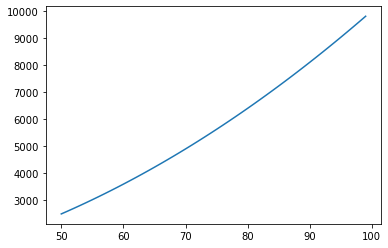

In [39]:
%matplotlib inline

import matplotlib.pyplot as plt

# erzeuge zwei Datenarrays
x = np.arange(-100,100)
y = x**2

# erzeuge eine Maske
ind = x >= 50

# plotte nur die maskierten Werte

fig, ax = plt.subplots()

#ax.plot(x,y)
ax.plot(x[ind], y[ind])

Insbesondere ist mit diesem Vorgehen das Sortieren sinnvoll, wenn man aus einem Array einen Sortier-Index-Array generiert und dann auf ein weiteres Array anwendet, dann wirkt es so, wie ein Zeilentausch in einer Tabelle!

## Allgemeine Anwendungen

Masken werden eingesetzt, um Arrays zu maskieren oder filtern, um ...:
 * ... schlechte Daten (z.B. Messfehler) von guten Daten zu trennen
 * ... Datenbereiche einzuschränken, z.B. Messwerte auf bestimmte Tage oder Messwerte größer einem Schwellenwert
 
Man kann dann entscheiden, die maskierten Werte auszuschneiden oder zu modifizeren, evt. zu korrigieren, wenn es möglich ist...